In [20]:
import sys
 
sys.path.append('..')

from GraphModels.solvers import GraphLasso, coordinate_descent
from GraphModels.model import DiagDominantPcorrModel, CholPCorrModel
from sklearn.covariance import GraphicalLasso, EmpiricalCovariance, graphical_lasso
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict
from scipy.stats import hmean

In [22]:
dim = 20
n_samples = 1000
density = 0.1
n_trials = 100

In [23]:
model = DiagDominantPcorrModel(dim, density)

# Diagonal Dominant generator
Improved diagonal dominant generator. Now DiagDominantPcorrModel normalizes diagonal elements in precision matrix (instead of covariance previously)

Test 1

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:02<00:00, 40.29it/s]


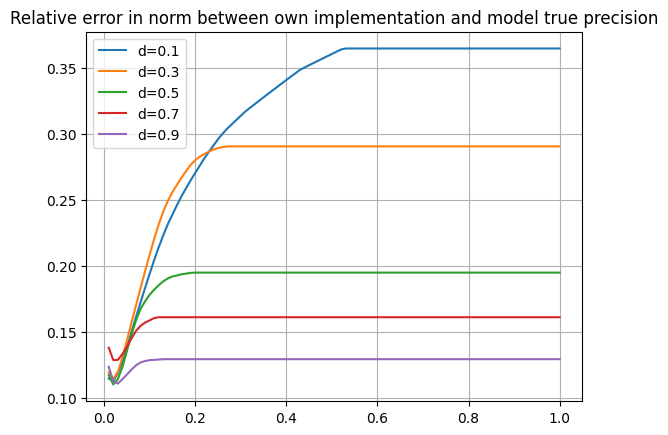

In [48]:
res = defaultdict(list)
lambda_space = np.linspace(0.01, 1, num=100)

for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = DiagDominantPcorrModel(dim, density)
    data = model.sample(n_samples)

    for reg_param in tqdm(lambda_space):      
        true_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        cov = EmpiricalCovariance(assume_centered=True).fit(data).covariance_
        my_lasso = graphical_lasso(cov, reg_param, max_iter=1000)

        diff_norm = np.linalg.norm(my_lasso[1] - model.precision)
        my_norm = np.linalg.norm(my_lasso[1])

        res[density].append(diff_norm / my_norm)
    
for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    plt.plot(lambda_space, res[density], label=f'd={density}')

plt.title('Relative error in norm between own implementation and model true precision')
plt.grid(True)
plt.legend()
plt.show()

Test 2

In [ ]:
res = defaultdict(list)
lambda_space = np.linspace(0.01, 1, num=100)

for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = DiagDominantPcorrModel(dim, density)
    data = model.sample(n_samples)

    for reg_param in tqdm(lambda_space):      
        true_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        cov = EmpiricalCovariance(assume_centered=True).fit(data).covariance_
        my_lasso = graphical_lasso(cov, reg_param, max_iter=1000)

        diff_norm = np.linalg.norm(my_lasso[1] - model.precision)
        my_norm = np.linalg.norm(my_lasso[1])

        res[density].append(diff_norm / my_norm)
    
for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    plt.plot(lambda_space, res[density], label=f'd={density}')

plt.title('Relative error in norm between own implementation and model true precision')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
res = defaultdict(list)
lambda_space = np.linspace(0.01, 1, num=100)

for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = DiagDominantPcorrModel(dim, density)
    data = model.sample(n_samples)

    for reg_param in tqdm(lambda_space):      
        true_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        #cov = EmpiricalCovariance(assume_centered=True).fit(data).covariance_
        #my_lasso = GraphLasso(reg_param, 1000).fit(cov)
        my_lasso = graphical_lasso(model.covariance, reg_param, max_iter=1000)

        diff_norm = np.linalg.norm(my_lasso[1] - model.precision)
        my_norm = np.linalg.norm(my_lasso[1])

        res[density].append(diff_norm / my_norm)
    
for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    plt.plot(lambda_space, res[density], label=f'd={density}')

plt.title('Relative error in norm between own implementation and model true precision')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
res = defaultdict(list)
lambda_space = np.linspace(0.01, 1, num=100)

for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = DiagDominantPcorrModel(dim, density)
    data = model.sample(n_samples)

    for reg_param in tqdm(lambda_space):      
        true_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        #cov = EmpiricalCovariance(assume_centered=True).fit(data).covariance_
        #my_lasso = GraphLasso(reg_param, 1000).fit(cov)
        my_lasso = graphical_lasso(model.covariance, reg_param, max_iter=1000)

        diff_norm = np.linalg.norm(my_lasso[1] - model.precision)
        my_norm = np.linalg.norm(my_lasso[1])

        res[density].append(diff_norm / my_norm)
    
for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    plt.plot(lambda_space, res[density], label=f'd={density}')

plt.title('Relative error in norm between own implementation and model true precision')
plt.grid(True)
plt.legend()
plt.show()

Frobenius norm of difference divided by Frobenius norm of my implementation results

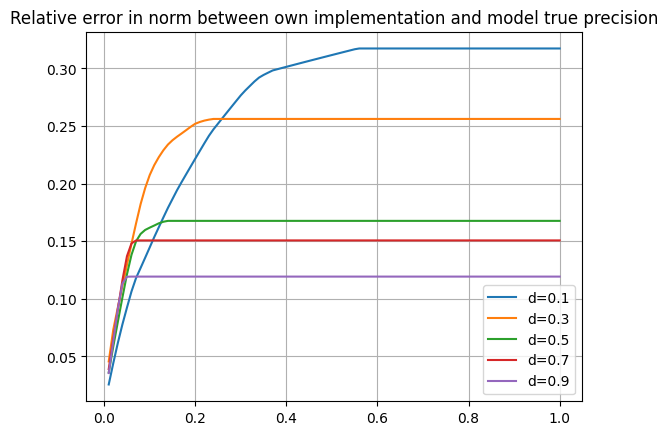

In [47]:
for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    plt.plot(lambda_space, res[density], label=f'd={density}')

plt.title('Relative error in norm between own implementation and model true precision')
plt.grid(True)
plt.legend()
plt.show()

<Axes: >

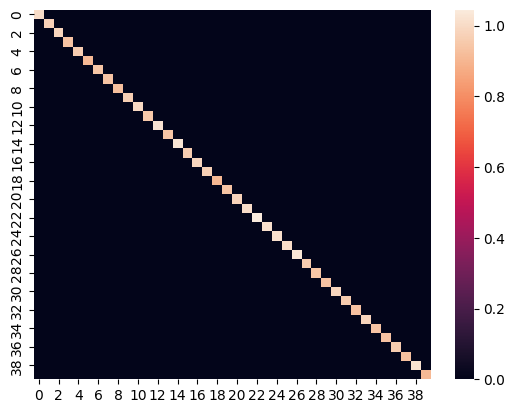

In [5]:
sns.heatmap(my_lasso.precision)

<Axes: >

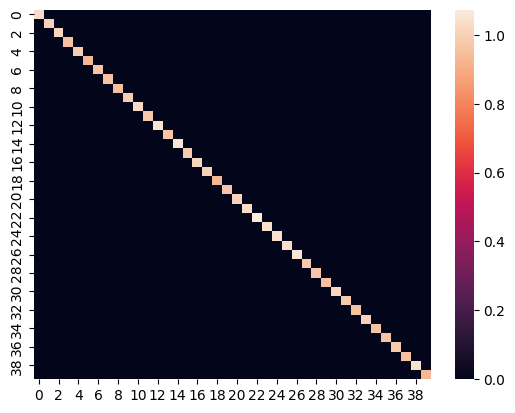

In [6]:
sns.heatmap(true_lasso.precision_)

# Choletsky generator
Convergence warnings appear only on this generator (at least appeared in my experiments)

In [23]:
res = defaultdict(list)
lambda_space = np.linspace(0.01, 2, num=250)

for density in [0.8, 0.9]:
    model = CholPCorrModel(dim, density)
    data = model.sample(n_samples)

    for reg_param in tqdm(lambda_space):      
        true_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        my_lasso = GraphLasso(reg_param, 1000).fit(np.cov(data.T))

        diff_norm = np.linalg.norm(my_lasso.precision - true_lasso.get_precision())
        my_norm = np.linalg.norm(my_lasso.precision)

        res[density].append(diff_norm / my_norm)
    

  0%|          | 0/250 [00:00<?, ?it/s]/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:297: ConvergenceWarning: graphical_lasso: did not converge after 1000 iteration: dual gap: -3.151e-03
  warnings.warn(
  1%|          | 2/250 [00:02<04:32,  1.10s/it]/home/zatrolque/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:297: ConvergenceWarning: graphical_lasso: did not converge after 1000 iteration: dual gap: -7.967e-04
  warnings.warn(
100%|██████████| 250/250 [00:22<00:00, 11.23it/s]


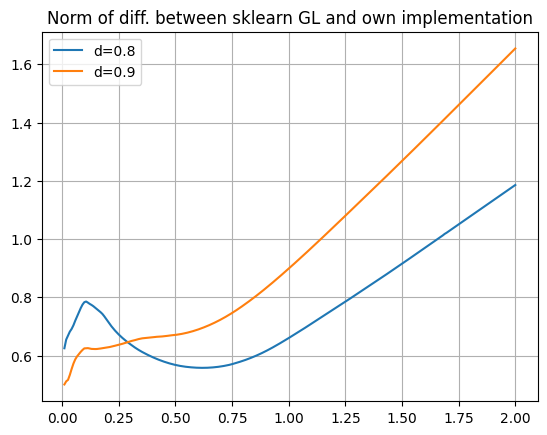

In [24]:
for density in [0.8, 0.9]:
    plt.plot(lambda_space, res[density], label=f'd={density}')

plt.title('Norm of diff. between sklearn GL and own implementation')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
model = DiagDominantPcorrModel(dim, 0.1)
data = model.sample(n_samples)
cov = EmpiricalCovariance(assume_centered=True).fit(data).covariance_
lasso = GraphLasso(1, 1000).fit(cov)
lasso.objective

[-143.25849846011548, -68.94889668781576]

# Comparison in terms of graph identification

In [45]:
res = defaultdict(list)
lambda_space = np.linspace(0.01, 1, num=100)

for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = DiagDominantPcorrModel(dim, density)
    data = model.sample(n_samples)

    for reg_param in tqdm(lambda_space):      
        true_lasso = GraphicalLasso(alpha=reg_param, max_iter=1000, assume_centered=True).fit(data)
        my_lasso = graphical_lasso(np.cov(data.T), reg_param)

        sklearn_graph = nx.from_numpy_array((true_lasso.get_precision() != 0.).astype(int) - np.eye(dim))
        my_graph = nx.from_numpy_array((my_lasso[1] != 0.).astype(int) - np.eye(dim))

        sk_confusion = np.array(model.confusion(sklearn_graph))
        my_confusion = np.array(model.confusion(my_graph))

        # TP, TN, FP, FN = sk_confusion
        
        # sk_tpr = TP / (TP + FN)
        # sk_tnr = TN / (TN + FP)
        # sk_ba = (sk_tpr + sk_tnr) / 2

        # sk_pre = TP / (TP + FP) if (TP + FP) != 0 else 1
        # sk_f1 = hmean([sk_pre, sk_tpr])

        # sk_neg_pre = TN / (TN + FN) if (TN + FN) != 0 else 1
        # sk_neg_f1 = sk_f1 = hmean([sk_neg_pre, sk_tnr])

        # TP, TN, FP, FN = my_confusion
        
        # my_tpr = TP / (TP + FN)
        # my_tnr = TN / (TN + FP)
        # my_ba = (my_tpr + my_tnr) / 2

        # my_pre = TP / (TP + FP) if (TP + FP) != 0 else 1
        # my_f1 = hmean([my_pre, my_tpr])

        # my_neg_pre = TN / (TN + FN) if (TN + FN) != 0 else 1
        # my_neg_f1 = sk_f1 = hmean([my_neg_pre, my_tnr])

        # res[density].append((sk_ba, my_ba, sk_f1, my_f1, sk_neg_f1, my_neg_f1))
        res[density].append(my_confusion, sk_confusion)
    

  2%|▏         | 2/100 [00:00<00:05, 19.09it/s]

100%|██████████| 100/100 [00:01<00:00, 76.18it/s]


In [42]:
metric_shift = {
    'BA': 0,
    'F1': 2,
    'neg_F1': 4,
}

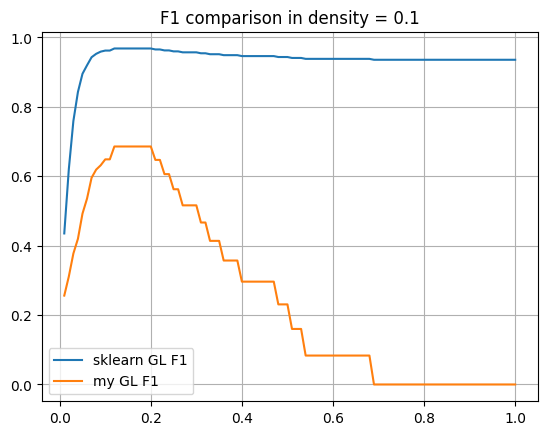

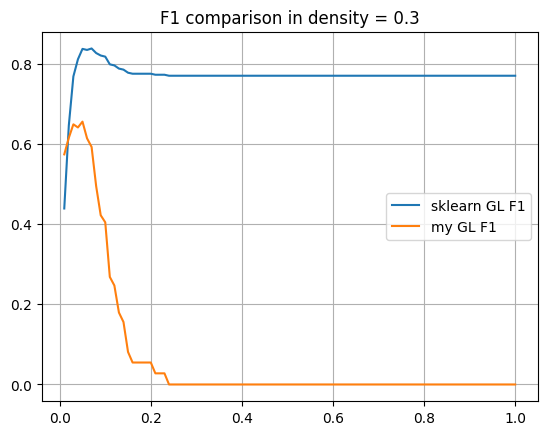

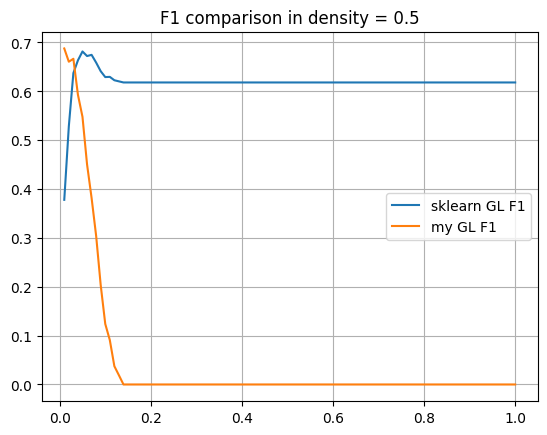

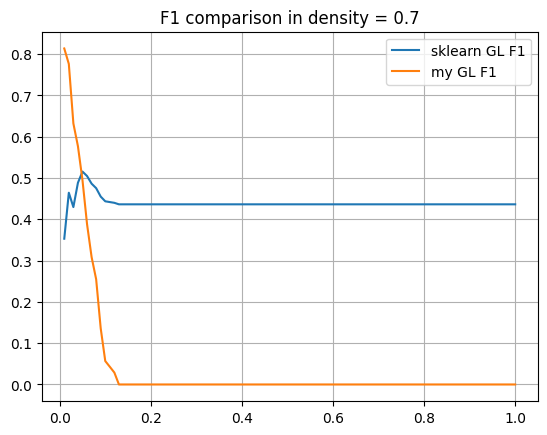

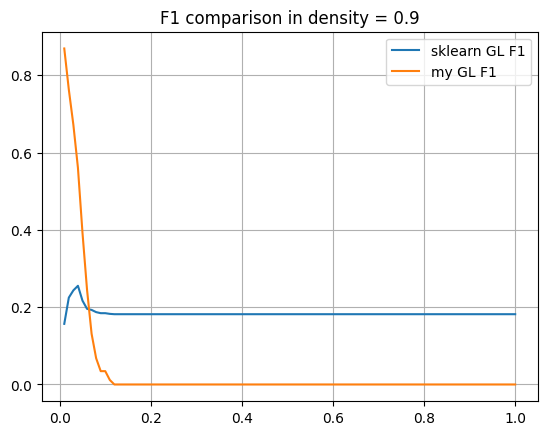

In [43]:
metric='F1'
shift = metric_shift[metric]

for density in [0.1, 0.3, 0.5, 0.7, 0.9]:
    sklearn_ba = [x[shift] for x in res[density]]
    my_ba = [x[shift + 1] for x in res[density]]
    plt.plot(lambda_space, sklearn_ba, label=f'sklearn GL {metric}')
    plt.plot(lambda_space, my_ba, label=f'my GL {metric}')

    plt.title(f'{metric} comparison in density = {density}')
    plt.grid(True)
    plt.legend()
    plt.show()

In [50]:
with open('gl_validation', 'wb') as f:
    pickle.dump(results, f)

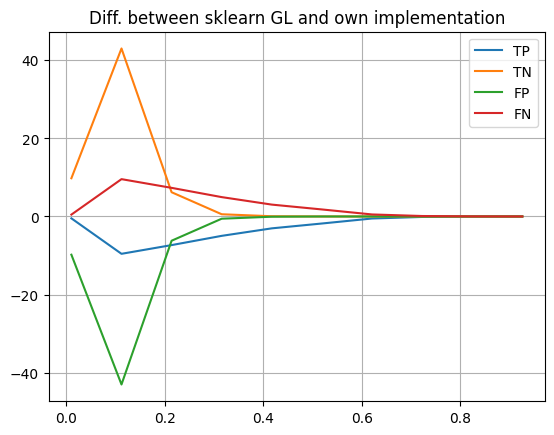

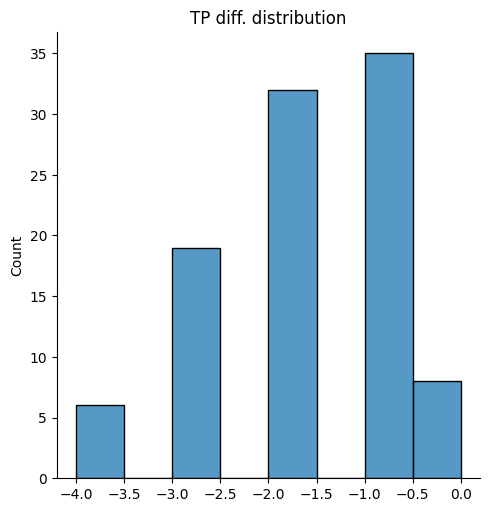

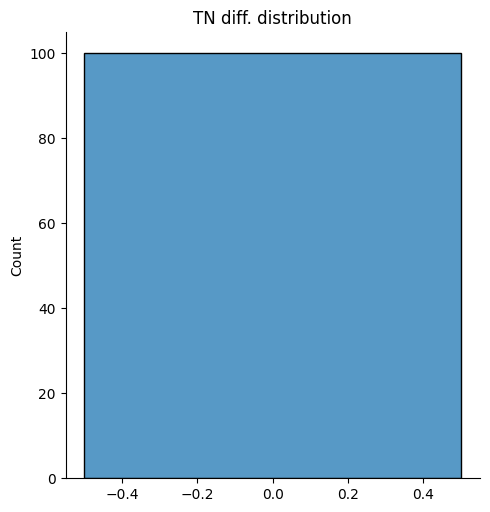

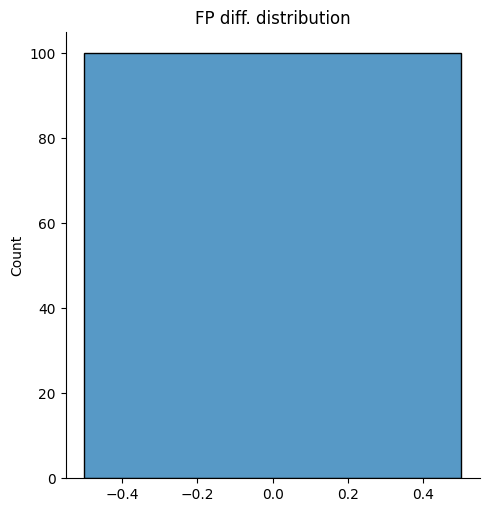

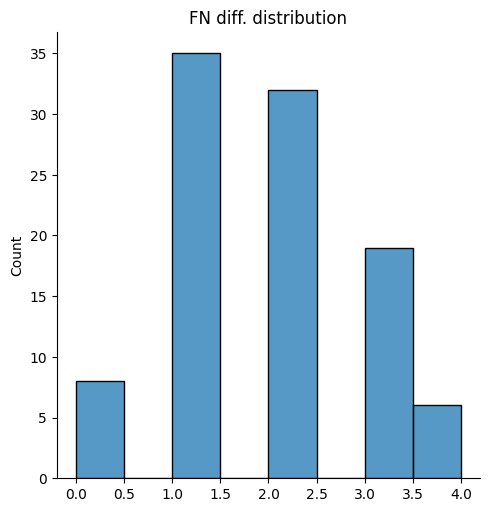

In [94]:
limit = 10
plt.plot(np.linspace(0.01, 5, num=50)[:limit], meanres[:, 0][:limit], label='TP')
plt.plot(np.linspace(0.01, 5, num=50)[:limit], meanres[:, 1][:limit], label='TN')
plt.plot(np.linspace(0.01, 5, num=50)[:limit], meanres[:, 2][:limit], label='FP')
plt.plot(np.linspace(0.01, 5, num=50)[:limit], meanres[:, 3][:limit], label='FN')
plt.title('Diff. between sklearn GL and own implementation')
plt.legend()
plt.grid(True)
plt.show()

sns.displot(results[5, :, 0].flatten())
plt.title('TP diff. distribution')
plt.show()
sns.displot(results[5, :, 1].flatten())
plt.title('TN diff. distribution')
plt.show()
sns.displot(results[5, :, 2].flatten())
plt.title('FP diff. distribution')
plt.show()
sns.displot(results[5, :, 3].flatten())
plt.title('FN diff. distribution')
plt.show()

In [81]:
results[:, :, 0].flatten()

array([-4, -3,  1, ...,  0,  0,  0])

In [43]:
np.linspace(0.01, 10, num=50)

array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])

In [5]:
true_lasso = GraphicalLasso(alpha=1).fit(data)
my_lasso = GraphLasso(1, 1000).fit(np.cov(data.T))

sklearn_pred_graph = nx.from_numpy_array((true_lasso.get_precision() != 0.).astype(int) - np.eye(dim))
my_pred_graph = my_lasso.graph

In [7]:
model.confusion(my_pred_graph)

(0, 40, 0, 5)

In [8]:
model.confusion(sklearn_pred_graph)

(0, 40, 0, 5)

# Experiment 2: finding out the identification quality

In [ ]:
dim = 20
n_samples = 100
densities = [0.1, 0.5, 0.9]

In [ ]:
for density in densities:
    model = DiagDominantPcorrModel(dim, density)
    data = model.sample(n_samples)

# Coordinate descent

In [6]:
V = np.random.uniform(size=(5, 5))
V = (V + V.T) / 2
u = np.random.uniform(size=5)
V, u

(array([[0.71696245, 0.51600098, 0.57104491, 0.67420109, 0.24641083],
        [0.51600098, 0.28645935, 0.41478536, 0.77769046, 0.56458934],
        [0.57104491, 0.41478536, 0.66454001, 0.56694944, 0.22490572],
        [0.67420109, 0.77769046, 0.56694944, 0.24423253, 0.60872624],
        [0.24641083, 0.56458934, 0.22490572, 0.60872624, 0.23884426]]),
 array([0.97917786, 0.38698999, 0.47740082, 0.36239476, 0.73206299]))

In [7]:
coordinate_descent(V, u)

array([0., 0., 0., 0., 0.])